In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
twoyears = pd.read_pickle("./2years.pkl") # Load whole data set
print (twoyears)

        CDateTime SalesPoint  SalesChannelKey     GroupCat ItemSize  \
0      2017-01-01      FDBDU                5  FLOOR TILES        Y   
1      2017-01-01      FDBDU                5  FLOOR TILES        Y   
2      2017-01-01      FDBDU                5  FLOOR TILES        U   
3      2017-01-01      FDBA1                5  FLOOR TILES        T   
4      2017-01-01      CADAM                1   WALL TILES        D   
...           ...        ...              ...          ...      ...   
445583 2018-12-31      DELUN                3   WALL TILES        P   
445584 2018-12-31      DELUN                3   WALL TILES        P   
445585 2018-12-31      FDBA1                5  FLOOR TILES        T   
445586 2018-12-31      FDBA1                5  FLOOR TILES        T   
445587 2018-12-31      FDJEL                5        GROUT        Q   

        DiscountPcnt  QTY  
0                5.0  110  
1                5.0   17  
2                0.0    7  
3                0.0    5  
4      

In [3]:
twoyears = twoyears.reset_index(drop=True)
print (twoyears)

         CDateTime SalesPoint  SalesChannelKey     GroupCat ItemSize  \
0       2017-01-01      FDBDU                5  FLOOR TILES        Y   
1       2017-01-01      FDBDU                5  FLOOR TILES        Y   
2       2017-01-01      FDBDU                5  FLOOR TILES        U   
3       2017-01-01      FDBA1                5  FLOOR TILES        T   
4       2017-01-01      CADAM                1   WALL TILES        D   
...            ...        ...              ...          ...      ...   
1452367 2018-12-31      DELUN                3   WALL TILES        P   
1452368 2018-12-31      DELUN                3   WALL TILES        P   
1452369 2018-12-31      FDBA1                5  FLOOR TILES        T   
1452370 2018-12-31      FDBA1                5  FLOOR TILES        T   
1452371 2018-12-31      FDJEL                5        GROUT        Q   

         DiscountPcnt  QTY  
0                 5.0  110  
1                 5.0   17  
2                 0.0    7  
3                 0

In [4]:
FT_data = twoyears.loc[twoyears.GroupCat=='FLOOR TILES'].reset_index(drop=True)  # Separate wall tiles
print (FT_data)

        CDateTime SalesPoint  SalesChannelKey     GroupCat ItemSize  \
0      2017-01-01      FDBDU                5  FLOOR TILES        Y   
1      2017-01-01      FDBDU                5  FLOOR TILES        Y   
2      2017-01-01      FDBDU                5  FLOOR TILES        U   
3      2017-01-01      FDBA1                5  FLOOR TILES        T   
4      2017-01-01      FDGAL                5  FLOOR TILES        Y   
...           ...        ...              ...          ...      ...   
480200 2018-12-31      FDAMB                5  FLOOR TILES        A   
480201 2018-12-31      FDAMB                5  FLOOR TILES        T   
480202 2018-12-31      FDJEL                5  FLOOR TILES        X   
480203 2018-12-31      FDBA1                5  FLOOR TILES        T   
480204 2018-12-31      FDBA1                5  FLOOR TILES        T   

        DiscountPcnt  QTY  
0                5.0  110  
1                5.0   17  
2                0.0    7  
3                0.0    5  
4      

In [5]:
FT_data.to_pickle("./FT.pkl")  # Save as a pickle file

In [2]:
FT_data = pd.read_pickle("./FT.pkl")  # Load the file
print (FT_data)

        CDateTime SalesPoint  SalesChannelKey     GroupCat ItemSize  \
0      2017-01-01      FDBDU                5  FLOOR TILES        Y   
1      2017-01-01      FDBDU                5  FLOOR TILES        Y   
2      2017-01-01      FDBDU                5  FLOOR TILES        U   
3      2017-01-01      FDBA1                5  FLOOR TILES        T   
4      2017-01-01      FDGAL                5  FLOOR TILES        Y   
5      2017-01-01      FDAMT                5  FLOOR TILES        A   
6      2017-01-01      FDRAT                5  FLOOR TILES        T   
7      2017-01-01      FDGAL                5  FLOOR TILES        A   
8      2017-01-01      FDBDU                5  FLOOR TILES        T   
9      2017-01-01      FDRAT                5  FLOOR TILES        T   
10     2017-01-01      FDBAL                5  FLOOR TILES        U   
11     2017-01-01      FDBAL                5  FLOOR TILES        U   
12     2017-01-01      FDBA1                5  FLOOR TILES        T   
13    

In [3]:
del (FT_data['GroupCat'])  # Remove the unwanted column
print (FT_data)

        CDateTime SalesPoint  SalesChannelKey ItemSize  DiscountPcnt  QTY
0      2017-01-01      FDBDU                5        Y           5.0  110
1      2017-01-01      FDBDU                5        Y           5.0   17
2      2017-01-01      FDBDU                5        U           0.0    7
3      2017-01-01      FDBA1                5        T           0.0    5
4      2017-01-01      FDGAL                5        Y           0.0    2
5      2017-01-01      FDAMT                5        A          35.0    8
6      2017-01-01      FDRAT                5        T           0.0   50
7      2017-01-01      FDGAL                5        A           0.0   40
8      2017-01-01      FDBDU                5        T           0.0   14
9      2017-01-01      FDRAT                5        T           0.0   21
10     2017-01-01      FDBAL                5        U           0.0    1
11     2017-01-01      FDBAL                5        U           0.0    3
12     2017-01-01      FDBA1          

In [4]:
FT_data = FT_data[(FT_data.SalesPoint != 'DELUN')]
FT_data = FT_data[(FT_data.SalesPoint != 'LWSR ')]

In [5]:
FT_data = FT_data[(FT_data.CDateTime != '2017-01-01')]

In [8]:
FT_data = FT_data.reset_index(drop=True)

In [10]:
del FT_data['index']

In [11]:
print (FT_data)

        CDateTime SalesPoint  SalesChannelKey ItemSize  DiscountPcnt   QTY
0      2017-01-02      FDKOT                5        T           5.0   301
1      2017-01-02      FDNIT                5        T           0.0     7
2      2017-01-02      FDWAT                5        M           5.0    40
3      2017-01-02      FDPER                5        T           5.0    60
4      2017-01-02      FDBA1                5        X           0.0    10
5      2017-01-02      DBKEG                2        T           0.0   492
6      2017-01-02      FDNIT                5        Y           0.0    20
7      2017-01-02      FDNIT                5        U           0.0     4
8      2017-01-02      FDDAM                5        T           0.0     4
9      2017-01-02      FDDAM                5        T           0.0     4
10     2017-01-02      FDPER                5        T           0.0    32
11     2017-01-02      CARAP                1        T          30.0    65
12     2017-01-02      FD

In [12]:
x=sorted(FT_data.ItemSize.unique())
print (x)
len(x)

['A', 'C', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'Q', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


17

In [13]:
y=sorted(FT_data.SalesChannelKey.unique())
print (y)
len(y)

[-1, 1, 2, 4, 5, 7]


6

In [14]:
floor_names = FT_data['SalesPoint'].unique().tolist()   # Salaepoints names
print (len(floor_names))

87


In [17]:
print (floor_names)

['FDKOT', 'FDNIT', 'FDWAT', 'FDPER', 'FDBA1', 'DBKEG', 'FDDAM', 'CARAP', 'FDBDU', 'FDHOR', 'DBPIL', 'CAKAN', 'FDMHI', 'FDCHW', 'CABLM', 'FDGAM', 'FDKUR', 'FDGAP', 'FDGAL', 'CAMAT', 'FDPND', 'FDWEN', 'FDMAT', 'FDJEL', 'DBHAN', 'FDNEG', 'FDMTL', 'FDWAP', 'FDKDW', 'FDJAF', 'FDMON', 'FDMOT', 'FDALU', 'CADAM', 'DBTHI', 'FDWEL', 'DBMHI', 'CAPEL', 'FDMIN', 'DBMAT', 'JWSR ', 'DBKIR', 'FDWAR', 'DBNAW', 'FDAMB', 'FDAMP', 'FDMTU', 'FDKAD', 'CAGOG', 'DBALU', 'FDKAL', 'FDBAL', 'FDRAT', 'FDKEG', 'FDVAV', 'FDEMB', 'FDAMT', 'DBNEG', 'DBWEN', 'DBSAM', 'FDBA2', 'DBHOR', 'DBCOL', 'DBANU', 'DBPER', 'DBDIG', 'DBANG', 'DBDAM', 'DBKUR', 'DBNAR', 'DBMTU', 'DBJF1', 'DBGAL', 'DBRAP', 'DBJF2', 'FDBAD', 'FDKAN', 'DBBAN', 'DBCO2', 'CAMTG', 'FDHRN', 'CAEHE', 'FDAVS', 'DBNUG', 'FDKLT', 'DBCO3', 'DBVAU']


In [15]:
floor_names = sorted(floor_names)   # Sort the names
print (floor_names)

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'CARAP', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCO2', 'DBCO3', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNAW', 'DBNEG', 'DBNUG', 'DBPER', 'DBPIL', 'DBRAP', 'DBSAM', 'DBTHI', 'DBVAU', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVS', 'FDBA1', 'FDBA2', 'FDBAD', 'FDBAL', 'FDBDU', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHOR', 'FDHRN', 'FDJAF', 'FDJEL', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKLT', 'FDKOT', 'FDKUR', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ']


In [16]:
floor_datas = {}
for i, g in FT_data.groupby('SalesPoint'):
    floor_datas.update({'floor_' + str(i) : g.reset_index(drop=True)})  # Create dataframes for each salespoint inside a dictionary
print ('end')

end


In [20]:
print (floor_datas.keys())

dict_keys(['floor_CABLM', 'floor_CADAM', 'floor_CAEHE', 'floor_CAGOG', 'floor_CAKAN', 'floor_CAMAT', 'floor_CAMTG', 'floor_CAPEL', 'floor_CARAP', 'floor_DBALU', 'floor_DBANG', 'floor_DBANU', 'floor_DBBAN', 'floor_DBCO2', 'floor_DBCO3', 'floor_DBCOL', 'floor_DBDAM', 'floor_DBDIG', 'floor_DBGAL', 'floor_DBHAN', 'floor_DBHOR', 'floor_DBJF1', 'floor_DBJF2', 'floor_DBKEG', 'floor_DBKIR', 'floor_DBKUR', 'floor_DBMAT', 'floor_DBMHI', 'floor_DBMTU', 'floor_DBNAR', 'floor_DBNAW', 'floor_DBNEG', 'floor_DBNUG', 'floor_DBPER', 'floor_DBPIL', 'floor_DBRAP', 'floor_DBSAM', 'floor_DBTHI', 'floor_DBVAU', 'floor_DBWEN', 'floor_FDALU', 'floor_FDAMB', 'floor_FDAMP', 'floor_FDAMT', 'floor_FDAVS', 'floor_FDBA1', 'floor_FDBA2', 'floor_FDBAD', 'floor_FDBAL', 'floor_FDBDU', 'floor_FDCHW', 'floor_FDDAM', 'floor_FDEMB', 'floor_FDGAL', 'floor_FDGAM', 'floor_FDGAP', 'floor_FDHOR', 'floor_FDHRN', 'floor_FDJAF', 'floor_FDJEL', 'floor_FDKAD', 'floor_FDKAL', 'floor_FDKAN', 'floor_FDKDW', 'floor_FDKEG', 'floor_FDKLT',

In [17]:
print (len(floor_datas.keys()))

87


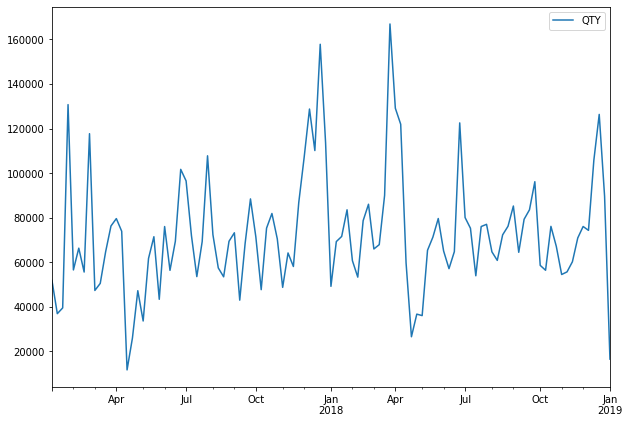

In [44]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 7
#plt.figure(figsize = (12, 9))
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import datetime

floorFeature_matrix = pd.DataFrame()
floorLabel_matrix = pd.DataFrame()
floor_sp_num = 0
year_dic = {'2017':0, '2018':1, '2019':2}
rem_list = list()
add_list = list()

arr = list()
floor_l = ['A', 'C', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'Q', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

for sp in floor_datas.keys():
    
    ######### Total sales #########
    
    sales = floor_datas[sp].filter(['CDateTime','QTY'], axis=1)   # extract 2 columns
    sales_aggre = sales.groupby('CDateTime').agg({'QTY':'sum'})  # group per day

    t_index = pd.DatetimeIndex(start='2017-01-02', end='2018-12-31', freq='1D')
    sales_aggre = sales_aggre.reindex(t_index).fillna(0)

    sales_aggre = sales_aggre.QTY.resample('W').sum()       # convert daily to weekly
    sales_aggre = pd.DataFrame(sales_aggre)
    sales_aggre.plot()
    break

    nonzero_weeks = (sales_aggre['QTY'] != 0).sum()  # Check whether salespoint has data of atleast 24 weeks(6 months). If not, remove that salespoint
    if (nonzero_weeks < 24):
        rem_list.append(sp)
        continue
    add_list.append('Is'+sp[6:])
    
    ################################
    
    ###### Weeks to New year ######
    w1 = sales_aggre.index.week
    w2 = list()
    yearNow=2017
    weeks_per_year=52
    newyear_week = datetime.date(2017, 4, 14).isocalendar()[1]  # Find the new year week
    con = True
    
    for i in range(len(w1)):
        if (con):
            x = newyear_week - w1[i]
        else:
            x = newyear_week + (weeks_per_year-w1[i])
            if (w1[i]==weeks_per_year):
                con=True
        if (x==0):
            weeks_per_year = datetime.date(yearNow, 12, 28).isocalendar()[1]
            newyear_week = datetime.date(yearNow+1, 4, 14).isocalendar()[1]
            yearNow += 1
            con=False
        w2.append(x)
    ################################
    
    ###### Weeks to Christmas ######
    w3 = list()
    yearNow=2017
    christmas_week = datetime.date(2017, 12, 25).isocalendar()[1]  # Find the Christmas week
    con = True
    
    for i in range(len(w1)):
        if (con==True):
            y = christmas_week - w1[i]
        else:
            y = christmas_week
            con=True
        if (y==0):
            if (w1[i]<datetime.date(yearNow+1, 1, 1).isocalendar()[1]):
                con=False
            christmas_week = datetime.date(yearNow+1, 12, 25).isocalendar()[1]
            yearNow += 1
        w3.append(y)
    ################################
    
    ################### Feature matrix & Label matrix ##################
    
    ################### Year, Month, Week ####################
    
    floor_features = pd.DataFrame(index=sales_aggre.index)     # wall_features dataframe stores all the features for one salespoint
        
    floor_features['Year'] = pd.Series(sales_aggre.index.year, index=floor_features.index)     # Year
    labelencoder = LabelEncoder()
    floor_features.iloc[:, 0] = labelencoder.fit_transform(floor_features.iloc[:, 0])  # Label encoded the year
     
    df_month = pd.DataFrame(sales_aggre.index.month)                # Month
    onehotencoder = OneHotEncoder(categorical_features = [0])
    array_month = onehotencoder.fit_transform(df_month).toarray()  # One hot encoded the 12 months
    df_month = pd.DataFrame(array_month, columns=['IsJan','IsFeb','IsMar','IsApr','IsMay','IsJun','IsJul','IsAug','IsSep','IsOct','IsNov','IsDec']).astype('int')
    df_month.index = floor_features.index
    floor_features = pd.concat([floor_features, df_month], axis=1)
        
    df_week = pd.DataFrame(sales_aggre.index.week)                       # Week
    onehotencoder1 = OneHotEncoder(categorical_features = [0])
    array_week = onehotencoder.fit_transform(df_week).toarray()  # One hot encoded the 53 weeks
    df_week = pd.DataFrame(array_week, columns=[('Isweek '+str(i)) for i in range(1,53)]).astype('int')
    df_week.index = floor_features.index
    floor_features = pd.concat([floor_features, df_week], axis=1)
    
    ##########################################################
    
    floor_features['WeeksToNewyear'] = w2    
    floor_features['WeeksToChristmas'] = w3
    
    ################ Channel behavior & QTYs ################
    
    subFrame = floor_datas[sp].filter(['CDateTime','SalesChannelKey','ItemSize','QTY'], axis=1)    # extract 4 columns
    weeks = [g for n, g in subFrame.set_index('CDateTime').groupby(pd.Grouper(freq='W'))]    # create weekly dataframes
    start_year = str((subFrame['CDateTime'].dt.year).iloc[0])
    start_week_of_year = (subFrame['CDateTime'].dt.week).iloc[0]
    start_week = 52 * year_dic[start_year] + start_week_of_year  # sales started day of salespoint
    print (floor_sp_num+1, sp, start_week)
        
    #counts = [[weeks[i]['SalesChannelKey'].value_counts(normalize=True)] for i in range(len(weeks))]     # customer cat. percents for each week
    
    floor_chan = np.zeros((sales_aggre.shape[0], 11))       # matrix for store channel percentages for each week (one salespoint)
    
    floor_keys = ['FloorTiles A','FloorTiles C','FloorTiles G','FloorTiles H','FloorTiles J','FloorTiles L','FloorTiles M',
                'FloorTiles N','FloorTiles P','FloorTiles Q','FloorTiles S','FloorTiles T','FloorTiles U','FloorTiles V',
                'FloorTiles W','FloorTiles X','FloorTiles Y']
    
    floor_dic = dict.fromkeys(floor_keys, None)      # dictionary for store QTY of group categories(labels) for each week (one salespoint)
    for key in floor_keys:
        floor_dic[key] = [0]*len(sales_aggre)    
        
    ############# Channel behavior ##############
    
    for week in range(len(weeks)):
        
        counts = [weeks[week]['SalesChannelKey'].value_counts(normalize=True)]  # Give channel percentages for week 
        countPcnt = counts[0].tolist()  # Percentage values
        cusCat = counts[0].index   # Channel names
        
        for i in range(len(cusCat)):
            floor_chan[start_week-1][int(cusCat[i])+1] = countPcnt[i]      # add percentages to a matrix
            
    ##############################################
            
    ###### QTY for group categories(labels) ######
        
        floor_table = pd.pivot_table(weeks[week], values='QTY', index=['ItemSize'], aggfunc=sum)  # Give total QTY for each wall tile sizes(for week)

        for floor in floor_table.index:
            floor_dic['FloorTiles '+floor.upper()][start_week-1] = floor_dic['FloorTiles '+floor.upper()][start_week-1] + floor_table.xs((floor))[0] # Store total QTYs in a dictioanary
        
        start_week += 1
    
    floor_labels = pd.DataFrame.from_dict(floor_dic)  # outputs dataframe for salespoint
    '''
    ############
    dfstd=pd.DataFrame(floor_labels.std())
    for i in range(17):
        arr.append(dfstd.values.tolist()[i][0])
    
    plt.plot(floor_l, arr)
    plt.title('Salespoint '+sp[6:])
    plt.xlabel('Wall tile type')
    plt.ylabel('Standard deviation')
    plt.show()
    arr = list()
    ############
    '''
    floorLabel_matrix = pd.concat([floorLabel_matrix, floor_labels])     # matrix for store labels of all salespoints
    
    ##############################################
    
    Sales_channels = ['Other','Other1','Consignment Agent','Distributors','Direct Dealers/Colombo Dealers','Direct Sales','Franchise Dealers',
                      'Lanka Tiles Plus','Projects','Royal Sales','Regional Sales']
    
    for i in range(11):
        floor_features[Sales_channels[i]] = floor_chan[:, i]  # Add channel percentage features
        
    del floor_features[Sales_channels[1]]  # These deleted channels haven't data
    del floor_features[Sales_channels[4]]
    del floor_features[Sales_channels[7]]
    del floor_features[Sales_channels[9]]
    del floor_features[Sales_channels[10]]
    
    ########################################################
    
    ################### Invoice discount ###################
    
    floor_invDiscount = floor_datas[sp].filter(['CDateTime','DiscountPcnt'], axis=1)   # extract date and invoice discount columns
    floor_invDiscount_aggre = floor_invDiscount.groupby('CDateTime').agg({'DiscountPcnt':'mean'})  # Group per day
    
    floor_invDiscount_aggre = floor_invDiscount_aggre.reindex(t_index).fillna(0)
    floor_invDiscount_aggre = floor_invDiscount_aggre.DiscountPcnt.resample('W').mean()       # convert daily to weekly
    
    floor_features['Invoice Discount'] = floor_invDiscount_aggre     # invoice discount
    
    ########################################################

    floor_sales_p = [floor_sp_num] * len(sales_aggre)
    floor_features['Salespoint'] = floor_sales_p      # Add salespoint name as a feature until doing one hot encoding for salespoint names
    
    floor_features['QTY_sum'] = sales_aggre['QTY']  # Total sales for the week

    floorFeature_matrix = pd.concat([floorFeature_matrix, floor_features])    # matrix for store features of all salespoints
    
    floor_sp_num += 1
    
#del (wallFeature_matrix['Isweek 53'])

In [20]:
print (len(add_list))

79


In [88]:
print ([x[2:] for x in add_list])

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCO2', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNAW', 'DBNEG', 'DBPER', 'DBPIL', 'DBRAP', 'DBSAM', 'DBTHI', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVS', 'FDBA1', 'FDBAL', 'FDBDU', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHRN', 'FDJAF', 'FDJEL', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKOT', 'FDKUR', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ']


In [21]:
############### Salespoint columns ###############

floordf_sp = pd.DataFrame(floorFeature_matrix['Salespoint'].values)
onehotencoder2 = OneHotEncoder(categorical_features = [0])
floorarray_sp = onehotencoder2.fit_transform(floordf_sp).toarray()  # One hot encoded the salespoint column
floordf_sp = pd.DataFrame(floorarray_sp, columns=add_list).astype('int')
floordf_sp.index = floorFeature_matrix.index
floorFeature_matrix = pd.concat([floorFeature_matrix, floordf_sp], axis=1)
del floorFeature_matrix['Salespoint']

##################################################

floorLabel_matrix.index = floorFeature_matrix.index
#print (floorFeature_matrix)
#print (floorLabel_matrix)
#print (label_matrix.loc[:, 'ACCESSORIES':'TIMBER - PARQUE'])
#print (label_matrix.loc[:, 'FloorTiles A':'FloorTiles Y'])
#print (label_matrix.loc[:, 'WallTiles A':'WallTiles Y'])

In [40]:
floor_df_old = pd.concat([floorFeature_matrix, floorLabel_matrix], axis=1)
floor_df0 = floor_df_old[floor_df_old.QTY_sum != 0]  # Remove the data points which have 0 sales for the week
del floor_df0['QTY_sum']
floor_df0 = floor_df0.reset_index(drop=True)
floor_df = floor_df0.sample(frac=1).reset_index(drop=True)     # shuffled
#print (floor_df)

In [30]:
print (floor_df['Invoice Discount'].mean())

4.537416042359692


[0.9211626006852006, 731.9542879677836, 2556.0788373993146, 52.01069484024588, 4220.421067729727, 39.613949462243035]
1.0
[0.00012118965934550726, 0.09629710406101613, 0.3362819151952789, 0.006842612135277712, 0.5552455029245793, 0.005211676024502439]


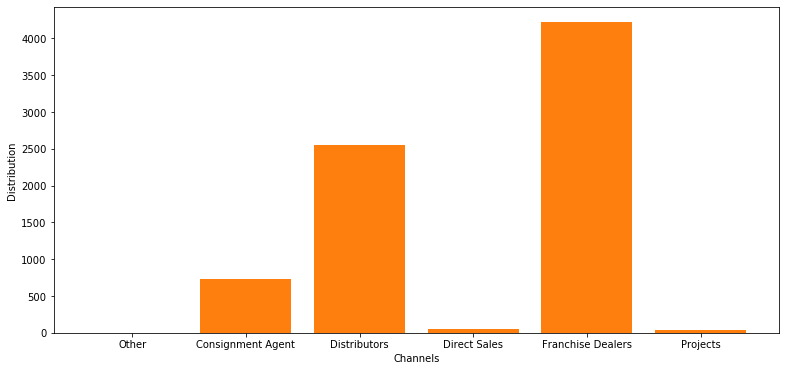

Text(0, 0.5, 'Distribution')

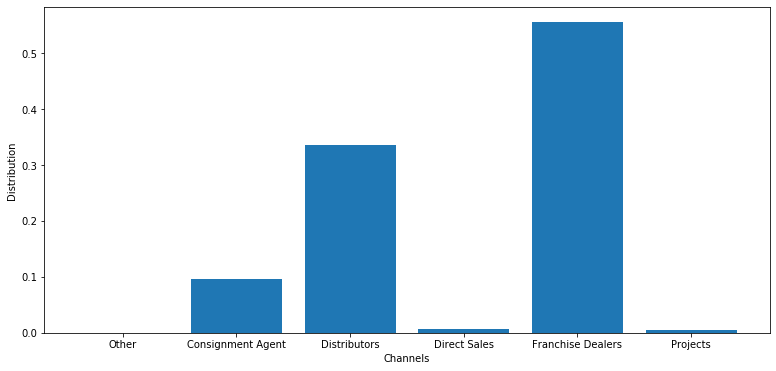

In [31]:
########## Channel distribution ##########
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6

sales_channels = ['Other','Consignment Agent','Distributors','Direct Sales','Franchise Dealers','Projects']

total = list()
for i in sales_channels:
    total.append(floorFeature_matrix[i].sum())
    
print (total)

distribution = [x/sum(total) for x in total]
print (sum(distribution))
print (distribution)
plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')

plt.bar(sales_channels, total)
plt.show()

plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')
##########################################

In [1]:
######### Histogram for invoice discount #########
rcParams['figure.figsize'] = 15, 8

di=pd.DataFrame()
di['Discount'] = floor_df['Invoice Discount']
y = di[di.Discount != 0]
x = y['Discount']
plt.hist(x, range=[0,40], bins=40) 
#plt.title(channel) 
plt.xlabel('Invoice Discount') 
plt.ylabel("Count")
plt.show()
###################################################   

NameError: name 'rcParams' is not defined

In [24]:
print (len(floorFeature_matrix.columns))
print (len(floorLabel_matrix.columns))

154
17


In [41]:
from sklearn.model_selection import train_test_split 

array = floor_df.values
X = array[:,0:153]
y = array[:,153:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)        

In [38]:
print (X.shape)

(7601, 153)


In [58]:
################# Random Forest #################

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
#num_of_trees = [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750]
#max_features = ['auto', 'sqrt'] 
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]         # Maximum number of levels in tree   
#max_depth.append(None)
#max_depth = [10,20,30,40,50,None]
#min_samples_split = [2, 3, 4, 5, 10]
#min_samples_leaf = [1, 2, 4] 
#bootstrap = [True, False]

#for x in max_features:
regressor = RandomForestRegressor(n_estimators=75, max_depth=30)
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_val = regressor.predict(X_val)

#print ('max_features: '+str(x))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
print (rmse_train)
print (rmse_val)
print ('\n')

'''
dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}

df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)

plt.plot(df_train['Actual'], label='Actual')
plt.plot(df_train['Predicted'], color='red', label='Predicted')
plt.title('Training Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
'''
'''
df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
'''
#################################################

Root Mean Squared Error: 493.99332061368995
Root Mean Squared Error: 941.5048817787448
[493.99332061368995]
[941.5048817787448]




"\ndf_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})\ndf_RF = df_RF.set_index('No of trees')\nplt.plot(df_RF['RMSE_train'], label='RMSE_train')\nplt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')\nplt.title('RMSE')\nplt.xlabel('No. of trees')\nplt.ylabel('RMSE')\nplt.legend()\nplt.show()\n"

Training set RMSE: 578.3954482772778
Validation set RMSE: 429.1325947323155


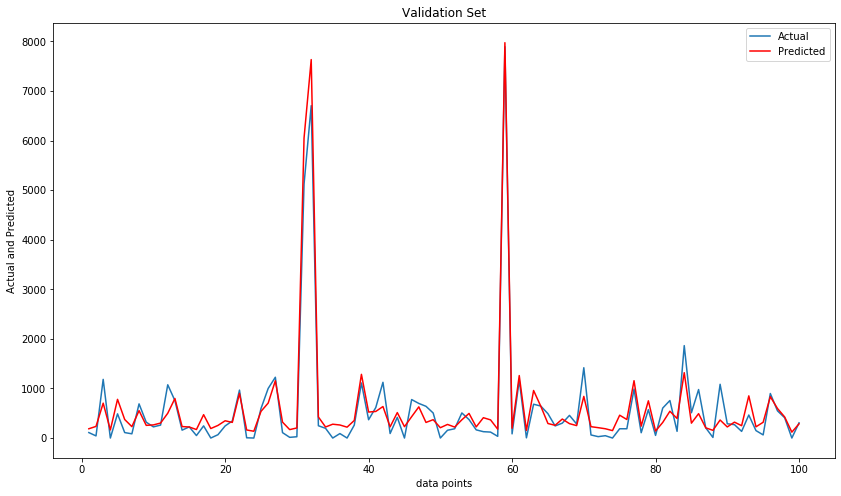

In [43]:
######## Save the selected model as a pickle file ########
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
from sklearn.externals import joblib 
  
#regressor = RandomForestRegressor(n_estimators=75, max_depth=30)
#regressor.fit(X_train, y_train)
    
# Save the model as a pickle in a file 
#joblib.dump(regressor, 'C:/Users/ChamithM/Desktop/Bestmodels/Floortiles_RFmodel_2years.pkl')  
  
# Load the model from the file 
RandomForest = joblib.load('C:/Users/ChamithM/Desktop/Bestmodels/Floortiles_RFmodel_2years.pkl')
  
# Use the loaded model to make predictions 
y_pred_train = RandomForest.predict(X_train)
y_pred_val = RandomForest.predict(X_val)

print('Training set RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Validation set RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

#dic_train = {'Actual':y_train[1000:1101,0], 'Predicted':y_pred_train[1000:1101,0]}
dic_val = {'Actual':y_val[400:501,0], 'Predicted':y_pred_val[400:501,0]}

#df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)

df_val = df_val.drop([0])
#df_val = df_val.drop([95])

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
##########################################################

In [41]:
############## Gradient Boosting ################

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
num_of_trees = [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750, 1000]
#learning_rate = [1,0.5,0.25,0.1,0.05,0.01]
#max_features = ['auto', 'sqrt'] 
#max_depth = [None,1,2,3]
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4] 

for x in num_of_trees:

    gbr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=x))
    gbr.fit(X_train, y_train)

    y_pred_train = gbr.predict(X_train)
    y_pred_val = gbr.predict(X_val)

    print ('num_of_trees: '+str(x))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print (rmse_val)
    print (rmse_train)
    print ('\n')
    '''
    dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
    dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}
    
    df_train = pd.DataFrame(dic_train)
    df_val = pd.DataFrame(dic_val)
    df_val = df_val.drop([3])
    df_val = df_val.drop([31])
    #print (df_val)
    
    plt.plot(df_train['Actual'], label='Actual')
    plt.plot(df_train['Predicted'], color='red', label='Predicted')
    plt.title('Training Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

    plt.plot(df_val['Actual'], label='Actual')
    plt.plot(df_val['Predicted'], color='red', label='Predicted')
    plt.title('Validation Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()
    '''
'''
df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
'''
##################################################

num_of_trees: 10
Root Mean Squared Error: 1157.7654160824588
Root Mean Squared Error: 1249.1826022893279
[1249.1826022893279]
[1157.7654160824588]


num_of_trees: 20
Root Mean Squared Error: 905.2358593574039
Root Mean Squared Error: 1125.2938466760495
[1249.1826022893279, 1125.2938466760495]
[1157.7654160824588, 905.2358593574039]


num_of_trees: 50
Root Mean Squared Error: 703.1820500477278
Root Mean Squared Error: 1097.6162508886312
[1249.1826022893279, 1125.2938466760495, 1097.6162508886312]
[1157.7654160824588, 905.2358593574039, 703.1820500477278]


num_of_trees: 75
Root Mean Squared Error: 650.206114288036
Root Mean Squared Error: 1097.8325994005604
[1249.1826022893279, 1125.2938466760495, 1097.6162508886312, 1097.8325994005604]
[1157.7654160824588, 905.2358593574039, 703.1820500477278, 650.206114288036]


num_of_trees: 100
Root Mean Squared Error: 621.8698320909893
Root Mean Squared Error: 1091.035405510648
[1249.1826022893279, 1125.2938466760495, 1097.6162508886312, 1097.83259

KeyboardInterrupt: 

In [43]:
############ Neural Network #############

from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(650, input_dim=153, activation= "relu"))
model.add(Dense(324, activation= "relu"))
model.add(Dense(160, activation= "relu"))
model.add(Dense(17))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

y_pred_train= model.predict(X_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

y_pred_val= model.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
'''
dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}
    
df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)
df_val = df_val.drop([3])
df_val = df_val.drop([31])
df_val = df_val.drop([80])

#df_train = df_train.drop([47])
#df_train = df_train.drop([81])
#df_val = df_val.drop([65])
#df_val = df_val.drop([71])

#print (df_train.iloc[80:101])
#print (df_val.iloc[51:101])
   
plt.plot(df_train['Actual'], label='Actual')
plt.plot(df_train['Predicted'], color='red', label='Predicted')
plt.title('Training Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
'''
#########################################

Epoch 1/40
6840/6840 [==============================] - 2s 281us/step - loss: 4198131.7916 - mean_squared_error: 4198132.5000
Epoch 2/40
6840/6840 [==============================] - 2s 267us/step - loss: 3818988.4430 - mean_squared_error: 3818988.5000
Epoch 3/40
6840/6840 [==============================] - 2s 274us/step - loss: 3532353.3303 - mean_squared_error: 3532353.0000
Epoch 4/40
6840/6840 [==============================] - 2s 276us/step - loss: 3105476.3879 - mean_squared_error: 3105475.7500
Epoch 5/40
6840/6840 [==============================] - 2s 266us/step - loss: 2762337.3923 - mean_squared_error: 2762337.5000
Epoch 6/40
6840/6840 [==============================] - 2s 264us/step - loss: 2522323.1207 - mean_squared_error: 2522323.5000
Epoch 7/40
6840/6840 [==============================] - 2s 264us/step - loss: 2396608.8602 - mean_squared_error: 2396609.0000
Epoch 8/40
6840/6840 [==============================] - 2s 262us/step - loss: 2301710.4384 - mean_squared_error: 23017

"\ndic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}\ndic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}\n    \ndf_train = pd.DataFrame(dic_train)\ndf_val = pd.DataFrame(dic_val)\ndf_val = df_val.drop([3])\ndf_val = df_val.drop([31])\ndf_val = df_val.drop([80])\n\n#df_train = df_train.drop([47])\n#df_train = df_train.drop([81])\n#df_val = df_val.drop([65])\n#df_val = df_val.drop([71])\n\n#print (df_train.iloc[80:101])\n#print (df_val.iloc[51:101])\n   \nplt.plot(df_train['Actual'], label='Actual')\nplt.plot(df_train['Predicted'], color='red', label='Predicted')\nplt.title('Training Set')\nplt.xlabel('data points')\nplt.ylabel('Actual and Predicted')\nplt.legend()\nplt.show()\n\nplt.plot(df_val['Actual'], label='Actual')\nplt.plot(df_val['Predicted'], color='red', label='Predicted')\nplt.title('Validation Set')\nplt.xlabel('data points')\nplt.ylabel('Actual and Predicted')\nplt.legend()\nplt.show()\n"